Code for reproducing figure 2 plots and analyses for transfer/interference comparisons in humans and ANNs


Eleanor Holton 27/03/2025

In [1]:
import sys
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Get notebook's directory and find project root (transfer-interference directory)
try:
    # Try to get notebook path (works in Jupyter)
    notebook_path = Path(__file__).parent if '__file__' in globals() else Path.cwd()
except:
    notebook_path = Path.cwd()

# Navigate up to find project root (directory containing 'src' and 'data')
project_root = Path(notebook_path).resolve()
while not (project_root / 'src').exists() or not (project_root / 'data').exists():
    if project_root == project_root.parent:  
        # If we can't find it, assume we're in notebooks folder
        project_root = Path(__file__).parent.parent if '__file__' in globals() else Path.cwd().parent
        break
    project_root = project_root.parent

# Add project root to Python path
sys.path.insert(0, str(project_root))

# Setup figure output path
figure_path = project_root / 'figures/figure2_transfer_interference'
os.makedirs(figure_path, exist_ok=True)

# Create matplotlib cache directory and clear font cache to pick up font changes
try:
    cache_dir = Path.home() / '.cache' / 'matplotlib'
    cache_dir.mkdir(parents=True, exist_ok=True)
    matplotlib.font_manager._load_fontmanager(try_read_cache=False)
except Exception as e:
    print(f"Note: Could not clear font cache: {e}")

from src.analysis import participant, ann, stats
from src.utils import figure_utils, figure_settings
from src.utils.figure_settings import schedule_colours, cm_conv, med_fontsize, condition_order

import importlib
importlib.reload(figure_settings)
importlib.reload(ann)
importlib.reload(participant)
importlib.reload(figure_utils)
importlib.reload(stats)


<module 'src.analysis.stats' from '/home/kathrin/workspace/Structure-Function-Analysis-of-Network-Topologies/transfer-interference/src/analysis/stats.py'>

In [35]:
# Load data
participant_data = pd.read_csv(project_root / 'data/participants/trial_df.csv')
ann_data = ann.load_ann_data(project_root / 'data/simulations/rich_50')


## Transfer analyses

In [36]:

# compute transfer
human_transfer = participant.compute_transfer_humans(participant_data)

# Run same statistical tests on both
human_stats_all = stats.compare_transfer(human_transfer, metric_col='error_diff')
human_stats_study1 = stats.compare_transfer(human_transfer.loc[human_transfer['study'] == 1], metric_col='error_diff')
human_stats_study2 = stats.compare_transfer(human_transfer.loc[human_transfer['study'] == 2], metric_col='error_diff')
ann_transfer = ann.compute_transfer_anns(ann_data)
ann_stats = stats.compare_transfer(ann_transfer, metric_col='error_diff')


In [37]:
human_stats_study1

{'descriptives': {'same': {'mean': np.float64(-0.112),
   'sem': np.float64(0.023)},
  'near': {'mean': np.float64(-0.183), 'sem': np.float64(0.027)},
  'far': {'mean': np.float64(-0.332), 'sem': np.float64(0.028)}},
 'anova': {'f_stat': np.float64(18.687),
  'df_between': 2,
  'df_within': 148,
  'eta_squared': np.float64(0.202),
  'p_value': np.float64(0.0)},
 'posthoc': {'same_vs_near': {'t_stat': np.float64(1.99),
   'df': 99,
   'cohens_d': np.float64(0.4),
   'p_value': np.float64(0.025)},
  'same_vs_far': {'t_stat': np.float64(6.123),
   'df': 99,
   'cohens_d': np.float64(1.231),
   'p_value': np.float64(0.0)},
  'near_vs_far': {'t_stat': np.float64(3.851),
   'df': 98,
   'cohens_d': np.float64(0.778),
   'p_value': np.float64(0.0)}}}

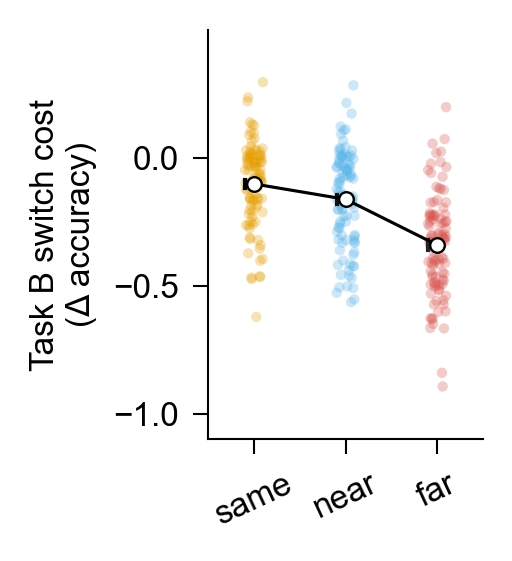

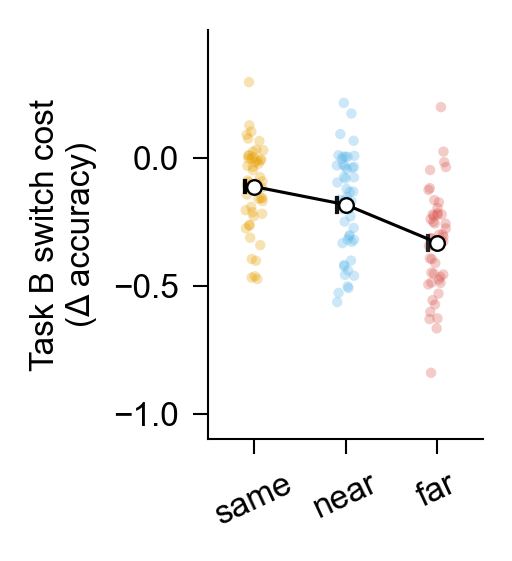

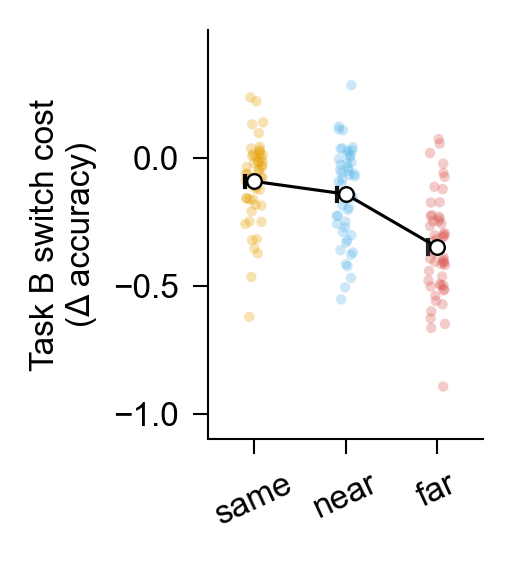

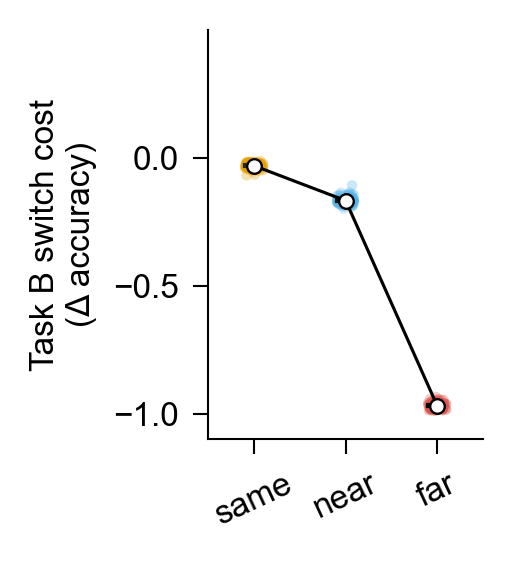

In [10]:
# Plot transfer

fig_participant, ax_participant = figure_utils.plot_transfer(human_transfer,'error_diff', condition_order, ylabel='Task B switch cost\n(Δ accuracy)', xlim=(-0.5, 2.5), ylim=(-1.1, 0.5), yticks=np.arange(-1,0.3,0.5),  schedule_colours=schedule_colours, p_values = np.nan,addtests=0)
fig_participant.savefig(os.path.join(figure_path, 'fig2A_human_transfer_all.png'), dpi=500, bbox_inches="tight")
#plt.close(fig_participant)

# plot separate conditions for supplementary figures
fig_participant_study1, ax_participant = figure_utils.plot_transfer(human_transfer.loc[human_transfer['study'] == 1],'error_diff', condition_order, ylabel='Task B switch cost\n(Δ accuracy)', xlim=(-0.5, 2.5), ylim=(-1.1, 0.5), yticks=np.arange(-1,0.3,0.5),  schedule_colours=schedule_colours, p_values = np.nan, addtests=0)
fig_participant_study1.savefig(os.path.join(figure_path, 'supp_human_transfer_study1.png'), dpi=500, bbox_inches="tight")
#plt.close(fig_participant_study1)

fig_participant_study2, ax_participant = figure_utils.plot_transfer(human_transfer.loc[human_transfer['study'] == 2],'error_diff', condition_order, ylabel='Task B switch cost\n(Δ accuracy)', xlim=(-0.5, 2.5), ylim=(-1.1, 0.5), yticks=np.arange(-1,0.3,0.5),  schedule_colours=schedule_colours, p_values = np.nan,addtests=0)
fig_participant_study2.savefig(os.path.join(figure_path, 'supp_human_transfer_study2.png'), dpi=500, bbox_inches="tight")
#plt.close(fig_participant_study2)

# plot ann data
fig_ann, ax_ann = figure_utils.plot_transfer(ann_transfer,'error_diff', condition_order, ylabel='Task B switch cost\n(Δ accuracy)', xlim=(-0.5, 2.5), ylim=(-1.1, 0.5), yticks=np.arange(-1,0.3,0.5),  schedule_colours=schedule_colours, p_values = np.nan,addtests=0)
fig_ann.savefig(os.path.join(figure_path, 'fig2C_ann_transfer.png'), dpi=500, bbox_inches="tight")
#plt.close(fig_ann)

## Interference analyses

In [38]:
print('ANN results\n')
ann_vonmises_params = pd.read_csv(project_root / 'data/simulations/rich_50_vonmises_fits.csv')
ann_results = stats.compare_interference(ann_vonmises_params)
print(ann_results)

print('human results\n')
# Load von Mises fit parameters
human_vonmises_params = pd.read_csv(project_root / 'data/participants/human_vonmises_fits.csv')

# Filter based on log likelihood comparison – rule B should have higher LL in B
human_vonmises_filtered = human_vonmises_params.loc[human_vonmises_params['B_LL_B'] > human_vonmises_params['A_LL_B'], :]

# Run analyses for each study
for study in [1, 2]:
    print(f'\n\nRESULTS FOR STUDY {study}')
    study_params = human_vonmises_filtered.loc[human_vonmises_filtered['study']==study, :]
    
    # Run statistical tests
    results = stats.compare_interference(study_params)
    
    print(results)


    

ANN results

{'A1_weights': {'t_stat': np.float64(5.334), 'df': 200, 'cohens_d': np.float64(0.754), 'p_value': np.float64(1.0), 'means': {'near': np.float64(0.967), 'far': np.float64(0.952)}, 'standard_errors': {'near': np.float64(0.002), 'far': np.float64(0.002)}}, 'A2_weights': {'t_stat': np.float64(-756684.789), 'df': 200, 'cohens_d': np.float64(-107011.389), 'p_value': np.float64(0.0), 'means': {'near': np.float64(0.0), 'far': np.float64(1.0)}, 'standard_errors': {'near': np.float64(0.0), 'far': np.float64(0.0)}}, 'A1_A2_difference': {'t_stat': np.float64(354.971), 'df': 200, 'cohens_d': np.float64(50.2), 'p_value': np.float64(0.0), 'means': {'near': np.float64(0.967), 'far': np.float64(-0.048)}, 'standard_errors': {'near': np.float64(0.002), 'far': np.float64(0.002)}}}
human results



RESULTS FOR STUDY 1
{'A1_weights': {'t_stat': np.float64(-1.014), 'df': 86, 'cohens_d': np.float64(-0.219), 'p_value': np.float64(0.157), 'means': {'near': np.float64(0.805), 'far': np.float64(0.856

/opt/miniconda3/envs/maslow_ann/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


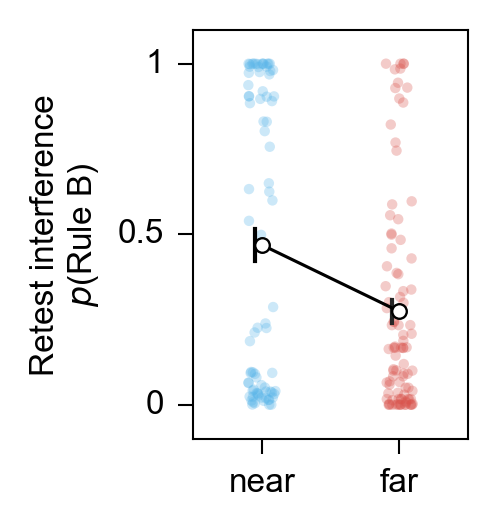

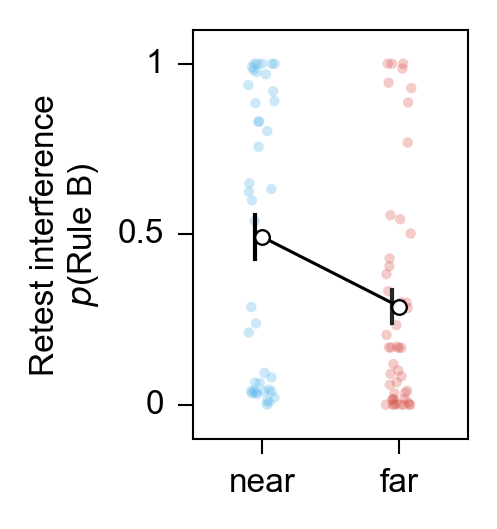

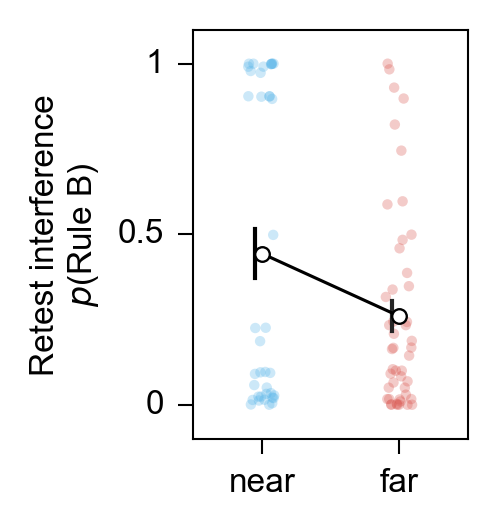

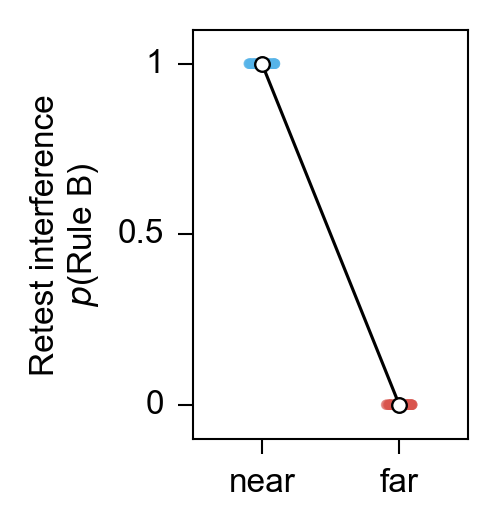

In [24]:
# Plot interference

fig, ax = figure_utils.plot_interference(
        human_vonmises_filtered, 
        "A_weight_A2", 
        schedule_colours, 
        figsize=[3 * cm_conv, 4.5 * cm_conv],
        ylabel='Retest interference\n$p$(Rule B)'
    )

fig.savefig(
        os.path.join(figure_path, f'fig2B_human_interference.png'),
        dpi=500, 
        bbox_inches="tight"
    )

# plot by study 
for study in [1,2]:
    # Create and save interference plot
    study_data = human_vonmises_filtered.loc[human_vonmises_filtered['study']==study, :]
    
    fig, ax = figure_utils.plot_interference(
        study_data, 
        "A_weight_A2", 
        schedule_colours, 
        figsize=[3 * cm_conv, 4.5 * cm_conv],
        ylabel='Retest interference\n$p$(Rule B)'
    )

    fig.savefig(
        os.path.join(figure_path, f'supp_interference_study{study}.png'),
        dpi=500, 
        bbox_inches="tight"
    )


# plot anns
fig, ax = figure_utils.plot_interference(
        ann_vonmises_params, 
        "A_weight_A2", 
        schedule_colours, 
        figsize=[3 * cm_conv, 4.5 * cm_conv],
        ylabel='Retest interference\n$p$(Rule B)'
    )   

fig.savefig(
        os.path.join(figure_path, f'fig2D_ann_interference.png'),
        dpi=500, 
        bbox_inches="tight"
    )


## Supplementary learning curves for S1

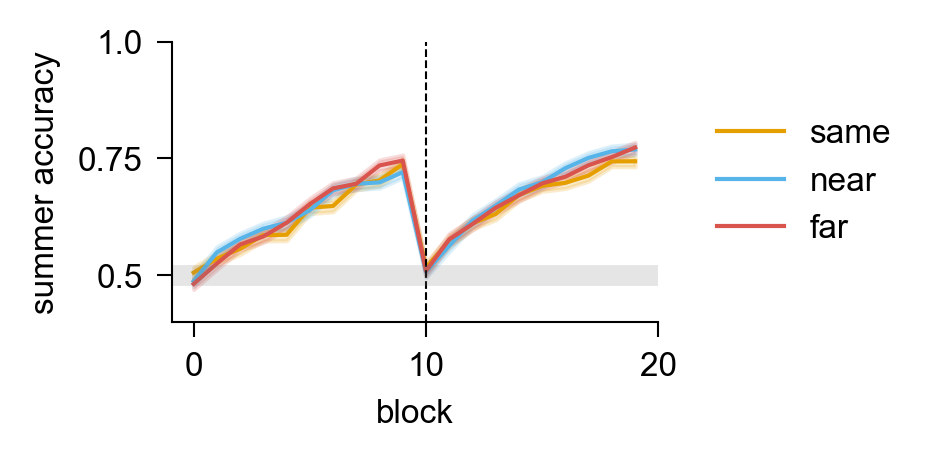

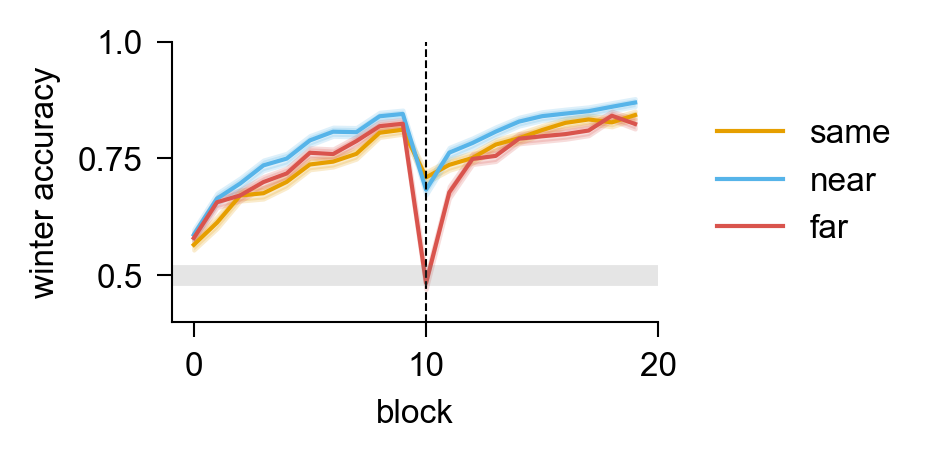

In [23]:
# Plot accuracy timecourse for both features
for feature_idx, feature_name in enumerate(['summer', 'winter']):
    # Create plot
    fig, ax = figure_utils.plot_accuracy_timecourse(
        participant_data,
        feature_idx,
        schedule_colours,
        condition_order
    )
    
    # Save figure
    fig.savefig(
        os.path.join(figure_path, f'supp_acc_{feature_name}.png'),
        dpi=500,
        bbox_inches="tight"
    )
    #plt.close(fig)